genres:  ['electric', 'pop', 'rock', 'dance', 'folk', 'classical', 'traditional', 'jazz', 'metal', 'dj', 'latin', 'country']


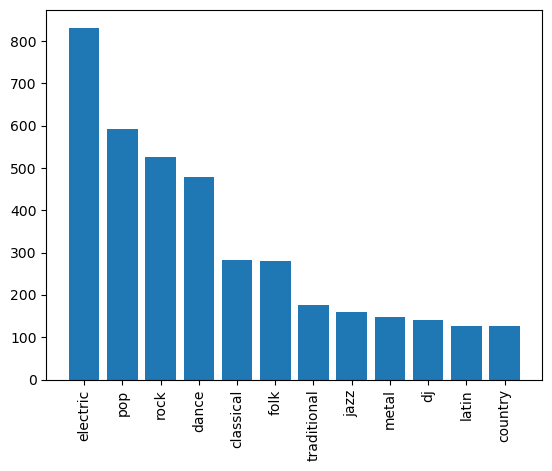

In [9]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt


# https://www.youtube.com/watch?v=7eh4d6sabA0&t
music_data = pd.read_csv("musiccaps-public.csv")
music_data = music_data[['aspect_list', 'caption']]

# clean data
words_to_remove_caption= ['the', 'a', 'this', 'song', 'features','to', 'of', 'could', 'be' 
                          'feature','there', 'is', 'recording', 'it', 'low', 'quality', 'an', 
                          'as', 'in', 'playing', 'played', 'audio', 'contains', 'that', 'and',
                          'later', 'has', 'or', 'she', 'has', 'which', 'here', 'also', 'for'
                          'we', 'have', 'i', 'with', 'at', 'can', 'be', 'by', 'such','use'
                          'on', 'are', 'using', 'where', 'but', 'sounds', 'into', 'then', 'me',
                          'you']


words_to_remove_aspect= ['poor', 'recording', 'poor', 'music', 'on', 'to', 'hi', 'no', 
                         'the', 'and', 'of', 'song', 'female', 'voice', 'male']

genres = ['electric', 'pop', 'rock', 'dance', 'folk', 'classical', 'traditional', 'jazz',
          'metal', 'dj', 'latin', 'country']


print("genres: ", genres)
#cleaning out captions
def clean_caption(caption):
    caption = caption.lower().replace('.', '').replace(',', '').replace(',', '').strip()
    caption = ' '.join([word for word in caption.split() if word.lower() not in words_to_remove_caption])
    return caption


def clean_aspect(aspect):
    aspect = aspect.lower().replace('[', '').replace(']', '').replace("'", '').replace(',', '')
    aspect = aspect.replace('low quality', '').replace(',', '').strip()
    aspect_list = list(set([word for word in aspect.split() if word.lower() in genres]))
    return aspect_list


def valid_caption(caption):
    return any(genre in caption.lower() for genre in genres)

def valid_aspect(aspect):
    return len(aspect) > 0

music_data['caption'] = music_data['caption'].apply(clean_caption)
music_data['aspect_list'] = music_data['aspect_list'].apply(clean_aspect)


# Flatten list of aspect labels
all_labels = [label for label_list in music_data['aspect_list'] for label in label_list]

# Get frequency of each label
label_freq = {}
for label in all_labels:
    if label in label_freq:
        label_freq[label] += 1
    else:
        label_freq[label] = 1

# Sort labels by frequency and get top 100
top_labels = sorted(label_freq.items(), key=lambda x: x[1], reverse=True)[:100]
top_labels = dict(top_labels)

# Plot bar graph of genre label frequency
plt.bar(top_labels.keys(), top_labels.values())
plt.xticks(rotation=90)
plt.show()

#removes rows with now empty labels because they dont have any genre
music_data = music_data[music_data['aspect_list'].apply(valid_aspect)]

#remove captions dont have genre listed
music_data = music_data[music_data['caption'].apply(valid_caption)]


#defining my input and output
x = music_data['caption']
y = music_data['aspect_list']

# multiLabelBinarizer converts aspect_list to binary labels
#find if the labels are present or not uses values of 0 and 1
mlb = MultiLabelBinarizer(classes=genres)

#transforms it to a binary matrix
y = mlb.fit_transform(y)





In [49]:
%%timeit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


#https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
#this article help me design the model
model = Pipeline([
                ('vect', CountVectorizer(stop_words=None)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs')))])

# fit the pipeline on the training data
model.fit(x_train, y_train)

# predict on the test data
pred = model.predict(x_test)

# calculte accuracy
accuracy = accuracy_score(y_test, pred)
print("score:", accuracy)
#print(classification_report(y_test, pred, target_names=genres))
print("********************************")

score: 0.7008928571428571
********************************
score: 0.7120535714285714
********************************
score: 0.6830357142857143
********************************
score: 0.6450892857142857
********************************
score: 0.6919642857142857
********************************
score: 0.7321428571428571
********************************
score: 0.7209821428571429
********************************
score: 0.7209821428571429
********************************
246 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
